In [36]:
from sklearn import datasets,cross_validation,naive_bayes
import  matplotlib.pyplot as plt
##以下函数从隔壁调用
##from .gaussianNB import test_GaussianNB
##from .multinomialNB import test_MultinomialNB,test_MultinomialNB_alpha
##from .bernoulliNB import test_BernoulliNB,test_BernoulliNB_alpha,test_BernoulliNB_binarize

# 定义相关函数

In [27]:
def load_data():
    '''
    加载用于分类问题的数据集。这里使用 scikit-learn 自带的 digits 数据集

    :return: 一个元组，用于分类问题。元组元素依次为：训练样本集、测试样本集、训练样本集对应的标记、测试样本集对应的标记
    '''
    digits=datasets.load_digits() # 加载 scikit-learn 自带的 digits 数据集
    return cross_validation.train_test_split(digits.data,digits.target,
		test_size=0.25,random_state=0,stratify=digits.target) #分层采样拆分成训练集和测试集，测试集大小为原始数据集大小的 1/4

In [28]:
def show_digits():
    '''
    绘制 digits 数据集。这里只是绘制数据集中前 25 个样本的图片。

    :return: None
    '''
    digits=datasets.load_digits()
    fig=plt.figure()
    print("vector from images 0:",digits.data[0])
    for i in range(25):
        ax=fig.add_subplot(5,5,i+1)
        ax.imshow(digits.images[i],cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()

In [29]:
#%%
from sklearn import naive_bayes
#%%
def test_GaussianNB(*data):
    '''
    测试 GaussianNB 的用法

    :param data: 可变参数。它是一个元组，这里要求其元素依次为：训练样本集、测试样本集、训练样本的标记、测试样本的标记
    :return: None
    '''
    X_train,X_test,y_train,y_test=data
    cls=naive_bayes.GaussianNB()
    cls.fit(X_train,y_train)
    print('Training Score: %.2f' % cls.score(X_train,y_train))
    print('Testing Score: %.2f' % cls.score(X_test, y_test))

In [30]:
if __name__=='__main__':
     # 产生用于分类问题的数据集
    X_train,X_test,y_train,y_test=load_data()

In [31]:
# 调用 test_GaussianNB# 调用 test_GaussianNB
test_GaussianNB(X_train,X_test,y_train,y_test)

Training Score: 0.85
Testing Score: 0.84


In [32]:
from sklearn import naive_bayes
import  numpy as np
import  matplotlib.pyplot as plt
#%%
def test_MultinomialNB(*data):
    '''
    测试 MultinomialNB 的用法

    :param data: 可变参数。它是一个元组，这里要求其元素依次为：训练样本集、测试样本集、训练样本的标记、测试样本的标记
    :return: None
    '''
    X_train,X_test,y_train,y_test=data
    cls=naive_bayes.MultinomialNB()
    cls.fit(X_train,y_train)
    print('Training Score: %.2f' % cls.score(X_train,y_train))
    print('Testing Score: %.2f' % cls.score(X_test, y_test))
def test_MultinomialNB_alpha(*data):
    '''
    测试 MultinomialNB 的预测性能随 alpha 参数的影响

    :param data: 可变参数。它是一个元组，这里要求其元素依次为：训练样本集、测试样本集、训练样本的标记、测试样本的标记
    :return: None
    '''
    X_train,X_test,y_train,y_test=data
    alphas=np.logspace(-2,5,num=200)
    train_scores=[]
    test_scores=[]
    for alpha in alphas:
        cls=naive_bayes.MultinomialNB(alpha=alpha)
        cls.fit(X_train,y_train)
        train_scores.append(cls.score(X_train,y_train))
        test_scores.append(cls.score(X_test, y_test))

    ## 绘图
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    ax.plot(alphas,train_scores,label="Training Score")
    ax.plot(alphas,test_scores,label="Testing Score")
    ax.set_xlabel(r"$\alpha$")
    ax.set_ylabel("score")
    ax.set_ylim(0,1.0)
    ax.set_title("MultinomialNB")
    ax.set_xscale("log")
    plt.show()

In [33]:
test_MultinomialNB(X_train,X_test,y_train,y_test) 

Training Score: 0.91
Testing Score: 0.90


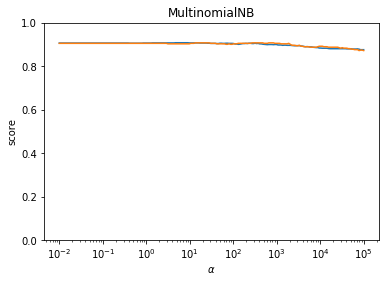

In [37]:
test_MultinomialNB_alpha(X_train,X_test,y_train,y_test)

In [38]:
test_BernoulliNB(X_train,X_test,y_train,y_test)

Training Score: 0.87
Testing Score: 0.87


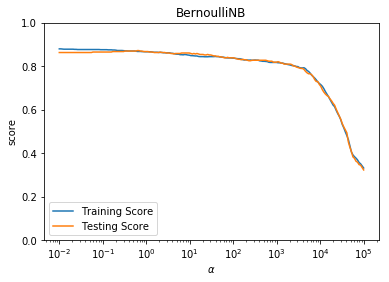

In [34]:
test_BernoulliNB_alpha(X_train,X_test,y_train,y_test)

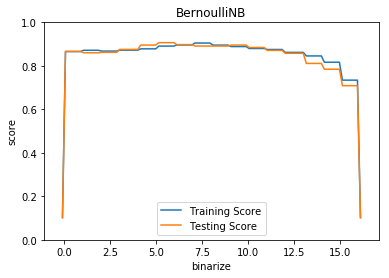

In [35]:
test_BernoulliNB_binarize(X_train,X_test,y_train,y_test) 